In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load the dataset into python environment

In [2]:
data = pd.read_csv('titanic_dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 2. Make ‘PassengerId’ as the index column

In [5]:
data = pd.read_csv('titanic_dataset.csv',index_col = 'PassengerId')
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## 3. Check the basic details of the dataset

In [6]:
data.shape

(891, 11)

In [7]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [9]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:>

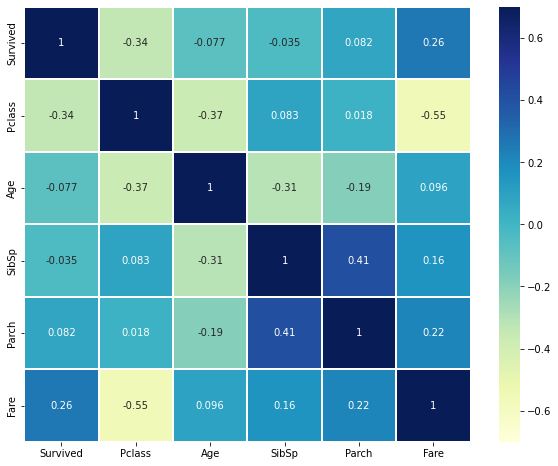

In [10]:
corr=data.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corr,vmin=-0.7,vmax=0.7,annot=True,linewidths=0.2,cmap='YlGnBu')

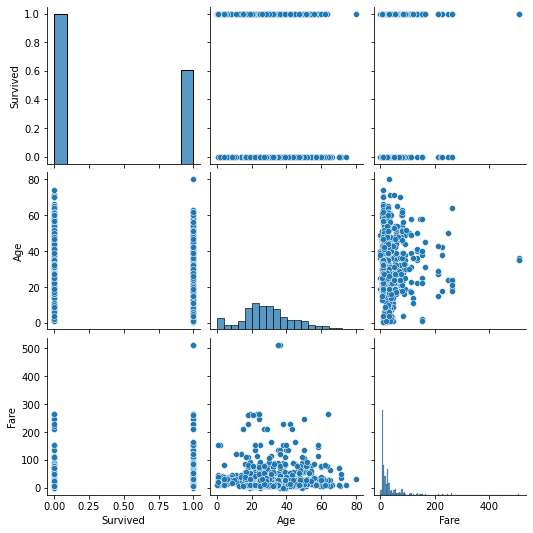

In [11]:
slice_data=data[['Survived','Age','Fare']]
sns.pairplot(slice_data)

## 4. Fill in all the missing values present in all the columns in the dataset

In [12]:
# to check the null values
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Here missing values present in age,cabin,Embarked features

C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

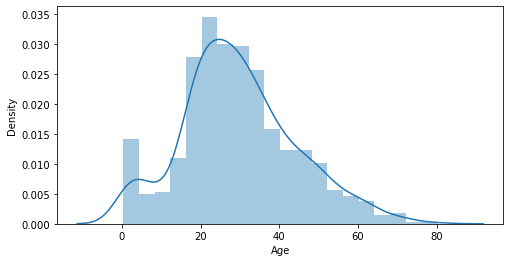

In [13]:
# Distribution plot of Ages
fig,ax =plt.subplots(figsize=(8,4))
sns.distplot(data.Age)

In [14]:
# Filling the missing values with mean
data['Age'] = data['Age'].fillna(data['Age'].mean())


In [15]:
# drop the features Cabin
data.drop('Cabin',axis = 1,inplace = True)


In [16]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].value_counts().index[0])

In [17]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

## 5. Check and handle outliers in at least 3 columns in the dataset

### 1) Handling outlier in column Age

{'whiskers': [<matplotlib.lines.Line2D at 0x240724e54c0>,
 'caps': [<matplotlib.lines.Line2D at 0x240724e5be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x240724e5130>],
 'medians': [<matplotlib.lines.Line2D at 0x240724ef340>],
 'fliers': [<matplotlib.lines.Line2D at 0x240724ef6d0>],
 'means': []}

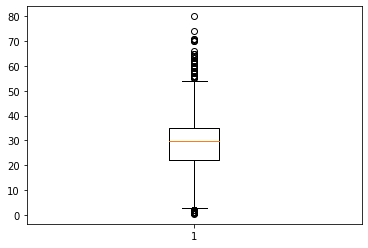

In [18]:
plt.boxplot(data['Age'])

In [19]:
# Handling outlier using percentile
Q1 = np.percentile(data['Age'],25,interpolation = 'midpoint')
Q2 = np.percentile(data['Age'],50,interpolation = 'midpoint')
Q3 = np.percentile(data['Age'],75,interpolation = 'midpoint')
print(Q1)
print(Q2)
print(Q3)

22.0
29.69911764705882
35.0


In [20]:
IQR = Q3 - Q1
low_lim = Q1-1.5*IQR
UP_LIM = Q3 + 1.5*IQR
print(low_lim)
print(UP_LIM)

2.5
54.5


In [21]:
outlier = []
for x in data['Age']:
    if((x>UP_LIM) or (x<low_lim)):
        outlier.append(x)
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [22]:
ind1 = data['Age'] > UP_LIM
data.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [23]:
data.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2407255c310>,
 'caps': [<matplotlib.lines.Line2D at 0x2407255ca30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2407254ff10>],
 'medians': [<matplotlib.lines.Line2D at 0x2407256a190>],
 'fliers': [<matplotlib.lines.Line2D at 0x2407256a520>],
 'means': []}

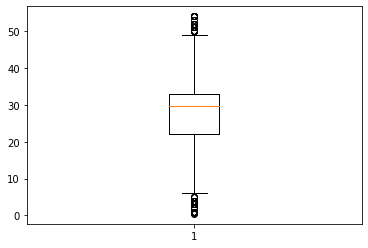

In [24]:
plt.boxplot(data['Age'])

### 2) Handling outlier in column Fair

{'whiskers': [<matplotlib.lines.Line2D at 0x240725b9130>,
 'caps': [<matplotlib.lines.Line2D at 0x240725b9850>,
 'boxes': [<matplotlib.lines.Line2D at 0x240725add60>],
 'medians': [<matplotlib.lines.Line2D at 0x240725b9f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x240725c2340>],
 'means': []}

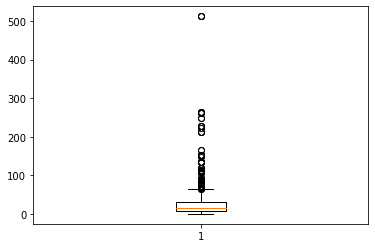

In [25]:
plt.boxplot(data['Fare'])

In [26]:
# Handling outlier using percentile
Q1 = np.percentile(data['Fare'],25,interpolation = 'midpoint')
Q2 = np.percentile(data['Fare'],50,interpolation = 'midpoint')
Q3 = np.percentile(data['Fare'],75,interpolation = 'midpoint')
print(Q1)
print(Q2)
print(Q3)

7.8958
14.1083
30.5


In [27]:
IQR = Q3 - Q1
low_lim = Q1-1.5*IQR
UP_LIM = Q3 + 1.5*IQR
print(low_lim)
print(UP_LIM)

-26.0105
64.4063


In [28]:
outlier = []
for x in data['Fare']:
    if((x>UP_LIM) or (x<low_lim)):
        outlier.append(x)


In [29]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 83.1583,
 69.55,
 89.1042,
 164.8667,
 69.55]

In [30]:
ind1 = data['Fare'] > UP_LIM
x =data.loc[ind1].index
x


Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=108)

In [31]:
data.drop(x,inplace = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2407260ee20>,
 'caps': [<matplotlib.lines.Line2D at 0x2407261a5b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2407260ea90>],
 'medians': [<matplotlib.lines.Line2D at 0x2407261acd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x240726240a0>],
 'means': []}

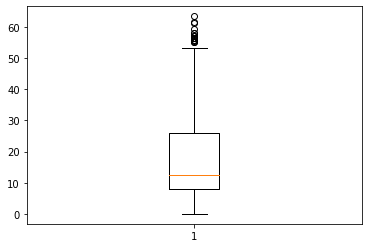

In [32]:
plt.boxplot(data['Fare'])

### 3) Handling missing values in column SibSp


{'whiskers': [<matplotlib.lines.Line2D at 0x24072677be0>,
 'caps': [<matplotlib.lines.Line2D at 0x240726863a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24072677850>],
 'medians': [<matplotlib.lines.Line2D at 0x24072686ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24072686e50>],
 'means': []}

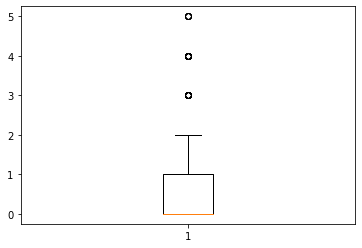

In [33]:
plt.boxplot(data['SibSp'])

In [34]:
# Handling outlier using percentile
Q1 = np.percentile(data['SibSp'],25,interpolation = 'midpoint')
Q2 = np.percentile(data['SibSp'],50,interpolation = 'midpoint')
Q3 = np.percentile(data['SibSp'],75,interpolation = 'midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [35]:
IQR = Q3 - Q1
low_lim = Q1-1.5*IQR
UP_LIM = Q3 + 1.5*IQR
print(low_lim)
print(UP_LIM)

-1.5
2.5


In [36]:
outlier = []
for x in data['SibSp']:
    if((x>UP_LIM) or (x<low_lim)):
        outlier.append(x)

In [37]:
outlier

[3,
 4,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4,
 4]

In [38]:
ind1 = data['SibSp'] > UP_LIM
data.loc[ind1].index

Int64Index([  8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851],
           dtype='int64', name='PassengerId')

In [39]:
data.drop([8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851],inplace = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x240726def10>,
 'caps': [<matplotlib.lines.Line2D at 0x240726ed670>,
 'boxes': [<matplotlib.lines.Line2D at 0x240726deb80>],
 'medians': [<matplotlib.lines.Line2D at 0x240726edd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x240726fa190>],
 'means': []}

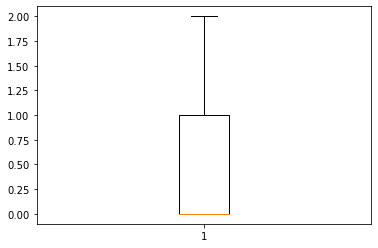

In [40]:
plt.boxplot(data['SibSp'])

In [41]:
## one hot encoding
data = pd.get_dummies(data, columns=['Sex', 'Embarked'])
data.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,0,1,0,0,1
3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,1,0,0,0,1
5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,0,1,0,0,1
6,0,3,"Moran, Mr. James",29.699118,0,0,330877,8.4583,0,1,0,1,0


## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)


In [42]:
data.drop(['Name','SibSp','Ticket'],axis=1,inplace=True)

In [43]:
data.head()

,Survived,Pclass,Age,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,22.000000,0,7.2500,0,1,0,0,1
3,1,3,26.000000,0,7.9250,1,0,0,0,1
4,1,1,35.000000,0,53.1000,1,0,0,0,1
5,0,3,35.000000,0,8.0500,0,1,0,0,1
6,0,3,29.699118,0,8.4583,0,1,0,1,0


In [44]:
#importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [45]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

In [46]:
scaled = scaler.fit_transform(data)
print(scaled)

[[0.         1.         0.40276222 ... 0.         0.         1.        ]
 [1.         1.         0.47741695 ... 0.         0.         1.        ]
 [1.         0.         0.64539007 ... 0.         0.         1.        ]
 ...
 [0.         1.         0.5464561  ... 0.         0.         1.        ]
 [1.         0.         0.47741695 ... 1.         0.         0.        ]
 [0.         1.         0.58939903 ... 0.         1.         0.        ]]


In [47]:
data_1 = pd.DataFrame(scaled)
data_1.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.402762,0.0,0.114429,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,0.477417,0.0,0.125082,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.645390,0.0,0.838091,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.645390,0.0,0.127055,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.546456,0.0,0.133499,0.0,1.0,0.0,1.0,0.0


In [48]:
data_1.describe()

,0,1,2,3,4,5,6,7,8,9
count,705.000000,705.000000,705.000000,705.00000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,0.354610,0.746099,0.524029,0.04870,0.264840,0.314894,0.685106,0.156028,0.096454,0.747518
std,0.478735,0.360618,0.191553,0.12716,0.207379,0.464803,0.464803,0.363140,0.295422,0.434745
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.402762,0.00000,0.124359,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.546456,0.00000,0.175720,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.608063,0.00000,0.378798,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
x = data_1.drop(0,axis = 1)
x

,1,2,3,4,5,6,7,8,9
0,1.0,0.402762,0.000000,0.114429,0.0,1.0,0.0,0.0,1.0
1,1.0,0.477417,0.000000,0.125082,1.0,0.0,0.0,0.0,1.0
2,0.0,0.645390,0.000000,0.838091,1.0,0.0,0.0,0.0,1.0
3,1.0,0.645390,0.000000,0.127055,0.0,1.0,0.0,0.0,1.0
4,1.0,0.546456,0.000000,0.133499,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
700,0.5,0.496081,0.000000,0.205182,0.0,1.0,0.0,0.0,1.0
701,0.0,0.346771,0.000000,0.473498,1.0,0.0,0.0,0.0,1.0
702,1.0,0.546456,0.333333,0.370117,1.0,0.0,0.0,0.0,1.0
703,0.0,0.477417,0.000000,0.473498,0.0,1.0,1.0,0.0,0.0


In [50]:
y = data_1[0]
y

0      0.0
1      1.0
2      1.0
3      0.0
4      0.0
      ... 
700    0.0
701    1.0
702    0.0
703    1.0
704    0.0
Name: 0, Length: 705, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30,random_state=101)
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)

from sklearn.metrics import mean_squared_error
print('MSE is :',mean_squared_error(y_test,predictions))

MSE is : 0.17807195574047321


In [52]:
from sklearn.metrics import r2_score
print('R squared is :',r2_score(y_test,predictions))



R squared is : 0.27110510211294814
